In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Anuncio_Alquiler_ML_Limpio.csv', sep=';')
print(f'El dataset tiene un tamaño de {df.shape}')
df.head(5)

El dataset tiene un tamaño de (901, 11)


,Tipo_vivienda,Superficie construida,Habitaciones,Baños,Planta,Conservación,Precio,PMZona,PMm²Zona,RMP,RMH
0,Piso,121.0,3,2,1.0,En buen estado,2100.0,4039.88,19.27,27167.0,86403.0
1,Piso,225.0,4,3,1.0,En buen estado,2500.0,4039.88,19.27,27167.0,86403.0
2,Casa,600.0,6,7,0.0,En buen estado,4000.0,2561.81,12.41,21254.0,65428.0
3,Piso,89.0,2,2,0.0,Reformado,1600.0,1950.70,21.77,17026.0,39991.0
4,Piso,85.0,2,2,8.0,En buen estado,1790.0,2545.30,20.32,24659.0,63205.0


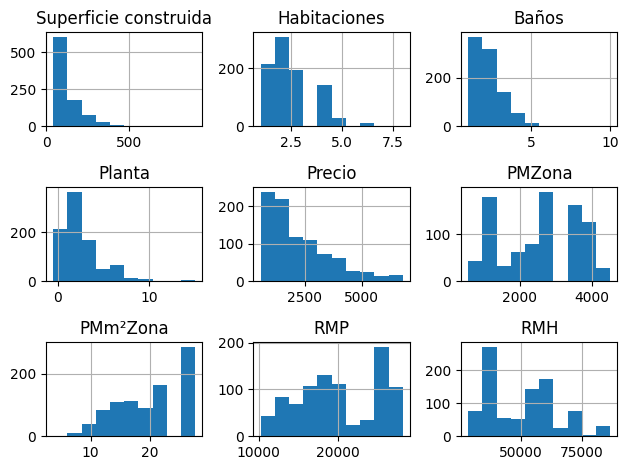

In [9]:
df.hist()
plt.tight_layout()
plt.show()

<AxesSubplot: >

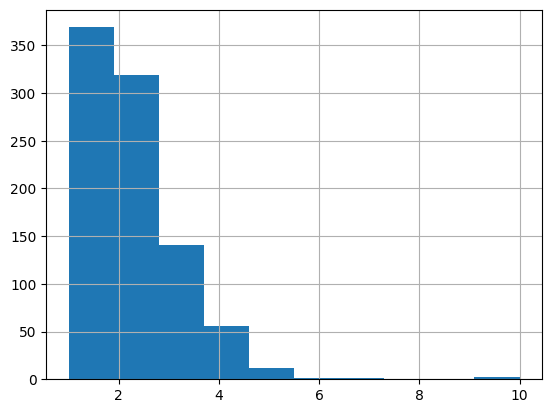

In [10]:
df['Baños'].hist()

In [11]:
df.dtypes

Tipo_vivienda             object
Superficie construida    float64
Habitaciones               int64
Baños                      int64
Planta                   float64
Conservación              object
Precio                   float64
PMZona                   float64
PMm²Zona                 float64
RMP                      float64
RMH                      float64
dtype: object

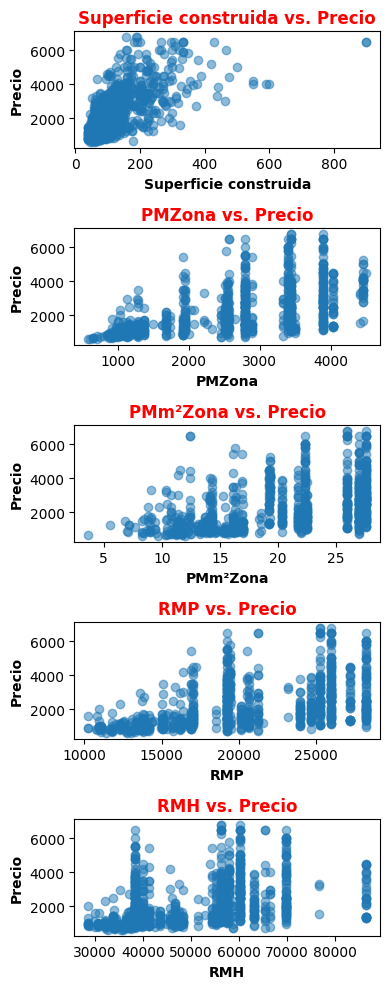

In [12]:
# Set up subplots
columnas_num_explorar = ['Superficie construida', 'PMZona', 'PMm²Zona', 'RMP', 'RMH']
num_plots = len(columnas_num_explorar)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(4, 2 * num_plots))

# Iterate through feature columns and create scatter plots
for i, feature in enumerate(columnas_num_explorar):
    axes[i].scatter(df[feature], df['Precio'], alpha=0.5)
    axes[i].set_title(f'{feature} vs. Precio', fontweight='bold', c='r')
    axes[i].set_xlabel(feature, fontweight='bold')
    axes[i].set_ylabel('Precio', fontweight='bold')

plt.tight_layout()
plt.show()

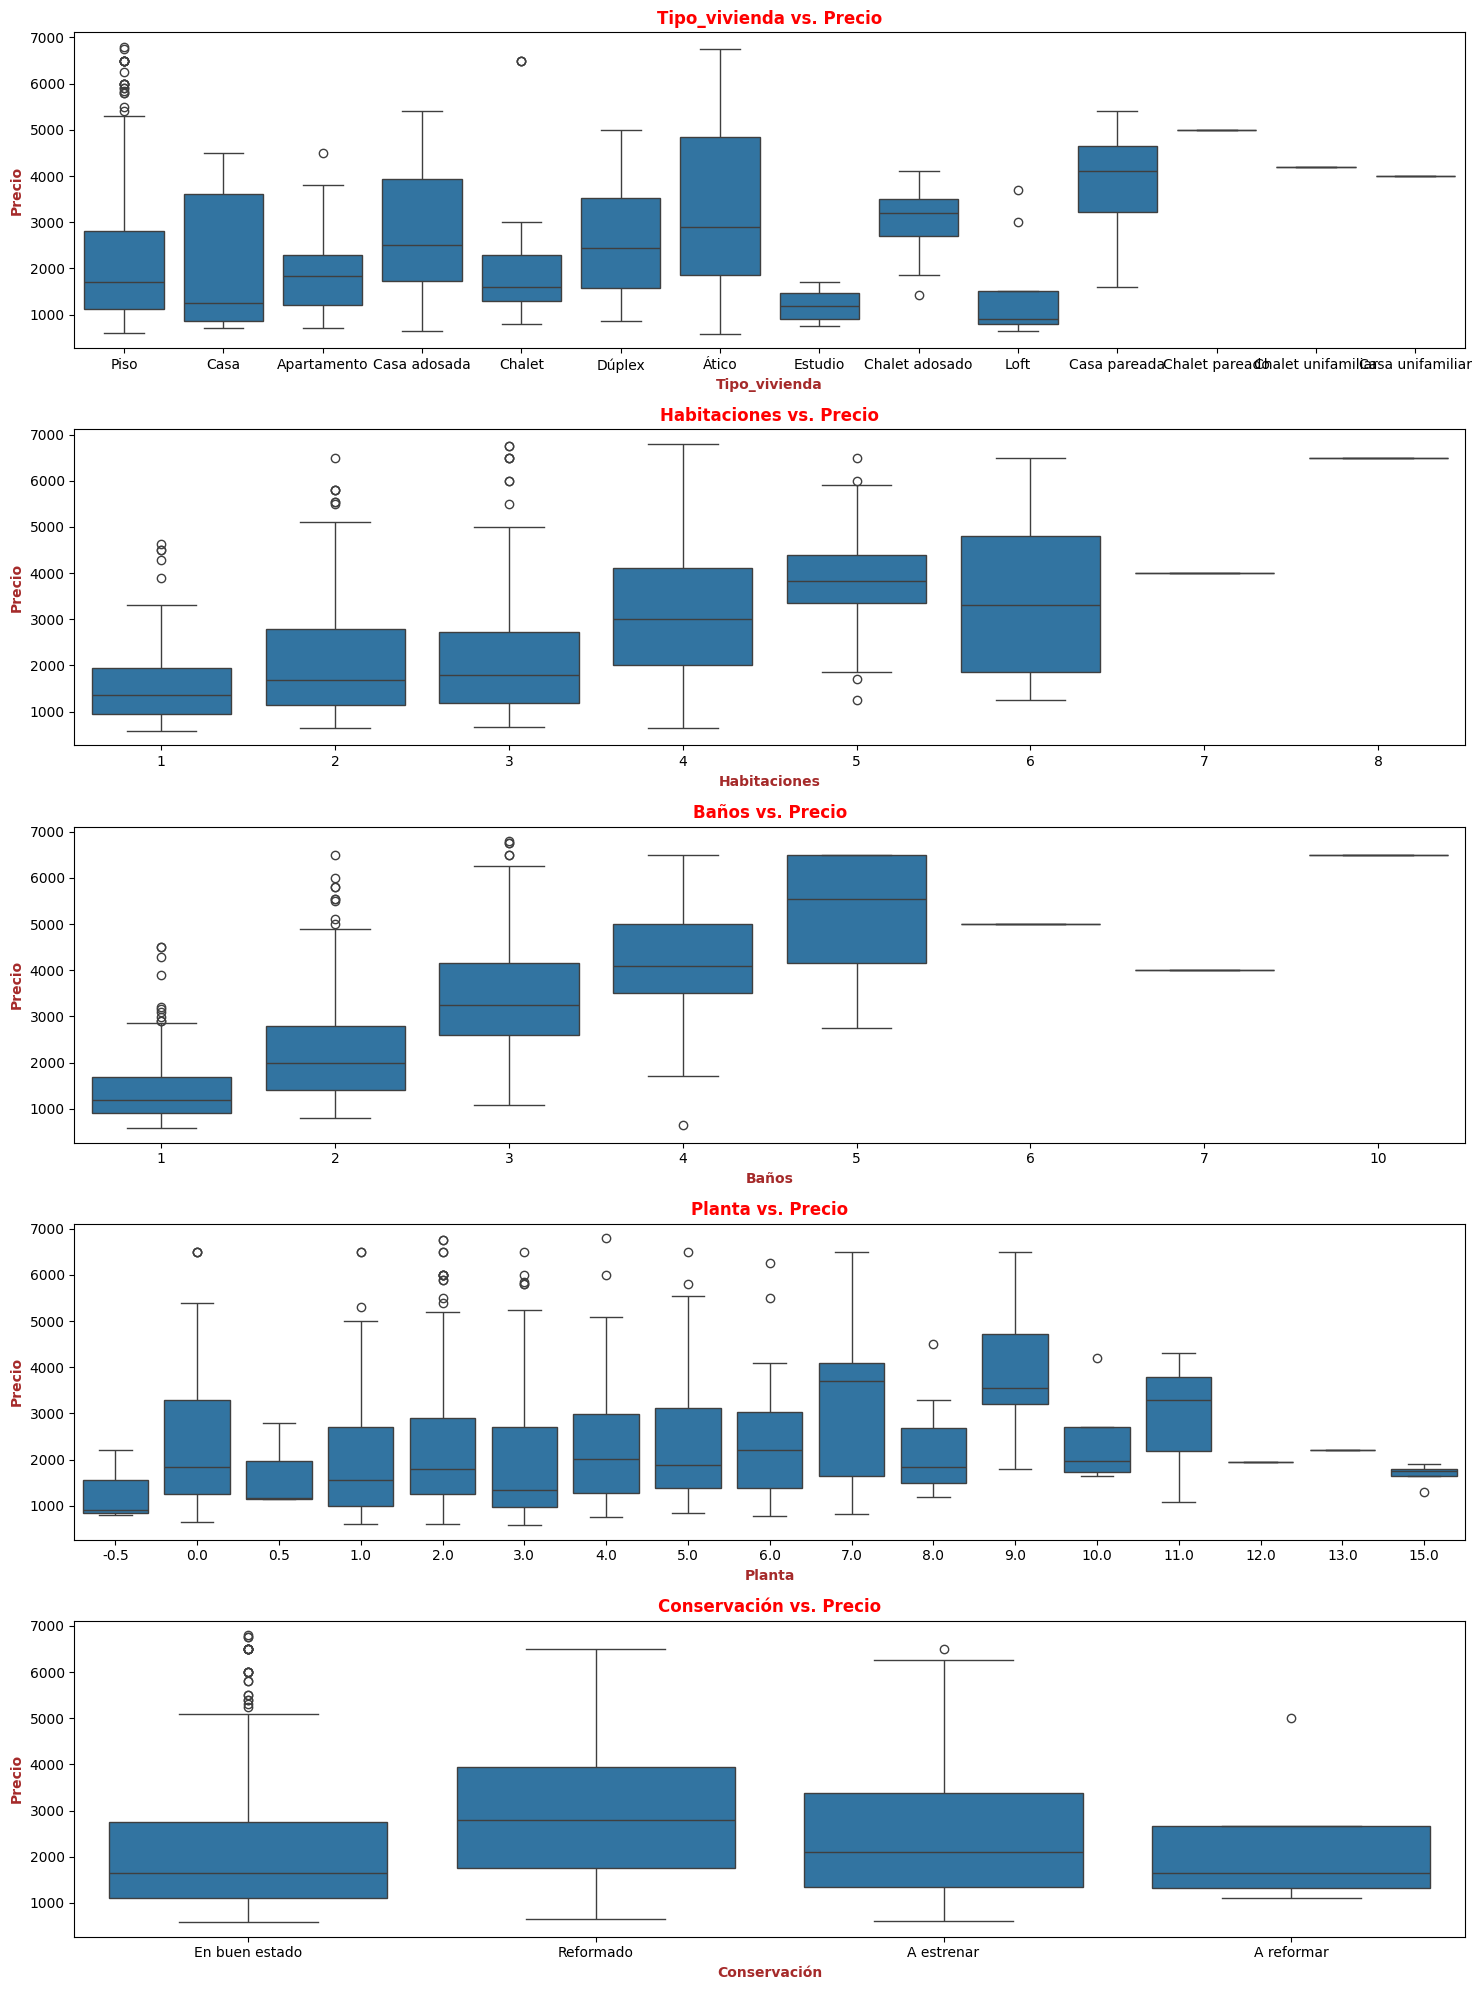

In [13]:
# Ahora para variables categóricas o discretas muy definidas
columnas_cat_explorar = ['Tipo_vivienda', 'Habitaciones', 'Baños', 'Planta', 'Conservación']
num_plots = len(columnas_cat_explorar)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(15, 4 * num_plots))

# Iterate through feature columns and create scatter plots
for i, feature in enumerate(columnas_cat_explorar):
    sns.boxplot(x=feature, y='Precio', data=df, ax=axes[i])
    axes[i].set_title(f'{feature} vs. Precio', fontweight='bold', c='r')
    axes[i].set_xlabel(feature, fontweight='bold', c='brown')
    axes[i].set_ylabel('Precio', fontweight='bold', c='brown')

plt.tight_layout()
plt.show()

<AxesSubplot: >

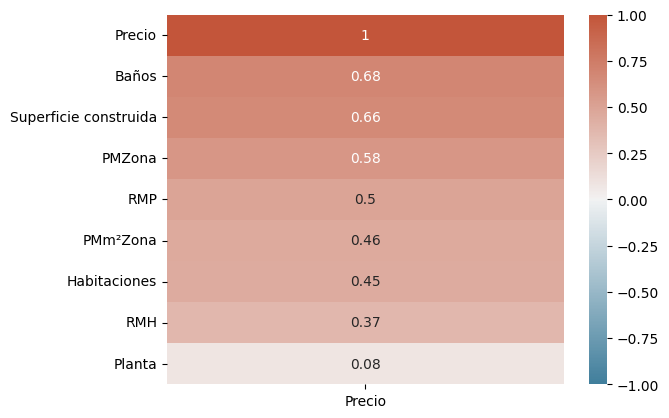

In [14]:
columnas_numericas = df.select_dtypes(include=['number']).columns.to_list()


df_correlation_target = df[columnas_numericas].corr().sort_values(by='Precio', ascending=False)[['Precio']]

sns.heatmap(df_correlation_target, cmap=sns.diverging_palette(230, 20, as_cmap=True), vmin=-1, vmax=1, annot=True)